In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import math

In [2]:
wireplane = 'U'
np.random.seed(42)

In [3]:
x_test = np.load('../processed_data/current/x_test_' + wireplane + '.npy')
y_test = np.load('../processed_data/current//y_test_AE_' + wireplane + '.npy')
mean = np.load('../latest_models/mean_' + wireplane + '_nu.npy')
std = np.load('../latest_models/scale_' + wireplane + '_nu.npy')

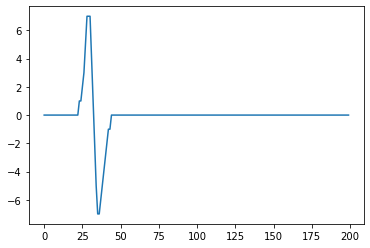

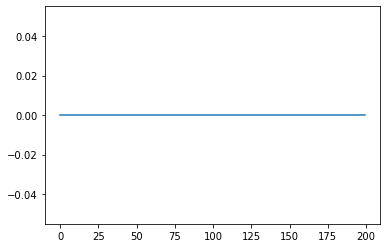

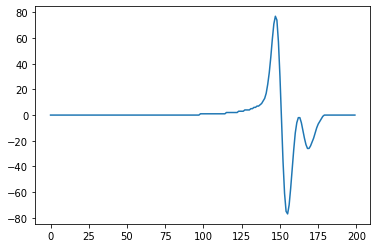

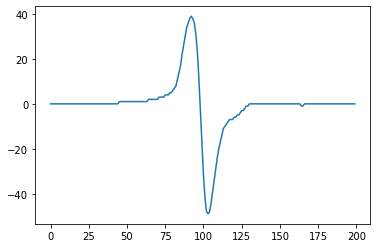

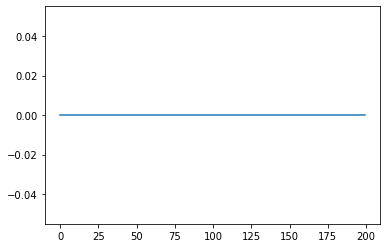

In [8]:
for i in range(5,10):
    plt.plot(y_test[i])
    plt.show()

In [5]:
y_test_scaled = []
for i in range(len(y_test)):
    if sum(y_test[i]) == 0:
        y_test_scaled.append(y_test[i])
    else:
        scaled = (y_test[i]-mean)/std
        y_test_scaled.append(scaled)
y_test_scaled = np.array(y_test_scaled)


In [12]:
sum(y_test[5] - y_test_scaled[5])

-8.613468797568675

In [13]:
sum(y_test[5] - y_test[5])

0

In [14]:
y_test_rescaled = std*y_test_scaled[5]+mean

In [15]:
sum(y_test[5] - y_test_rescaled)

8.881784197001252e-16

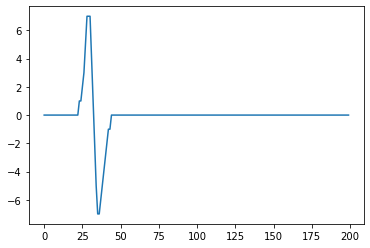

In [16]:
plt.plot(y_test_rescaled)

In [18]:
y_test_rescaled[0]

0.0